In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/My Drive/SpeechCourse/Google_Stock_Price_Train.csv')

In [4]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set=train.iloc[:,1:2].values

In [6]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# **Perform feature scaling to transform the data**



In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled.shape

(1258, 1)

# **Create a data structure with 60-time steps and 1 output**

In [9]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
#reshape it to (batche_size(#size of inputs),timesteps,input_dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train.shape

(1198, 60, 1)

In [12]:
#Initialising the RNN
regressor=Sequential()

In [13]:
#Adding the first LSTM layer and some dropout regularization
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))
#Adding the second LSTM layer and some dropout regularization
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
#Adding the third LSTM layer and some dropout regularization
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
#Adding the fourth LSTM layer and some dropout regularization
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))
#Adding the output layer
regressor.add(Dense(units=1))


In [14]:
#Compile the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
#Fitting the RNN to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 161ms/step - loss: 0.0429
Epoch 2/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0083
Epoch 3/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0073
Epoch 4/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0061
Epoch 5/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0064
Epoch 6/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0065
Epoch 7/100
38/38 [==============================] - 8s 213ms/step - loss: 0.0058
Epoch 8/100
38/38 [==============================] - 8s 205ms/step - loss: 0.0061
Epoch 9/100
38/38 [==============================] - 7s 195ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0057
Epoch 11/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0050
Epoch 12/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0054
Epoch 13/100

In [16]:
#Load the test data
test = pd.read_csv('/content/drive/My Drive/SpeechCourse/Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([train['Open'],test['Open']],axis=0)

In [17]:
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


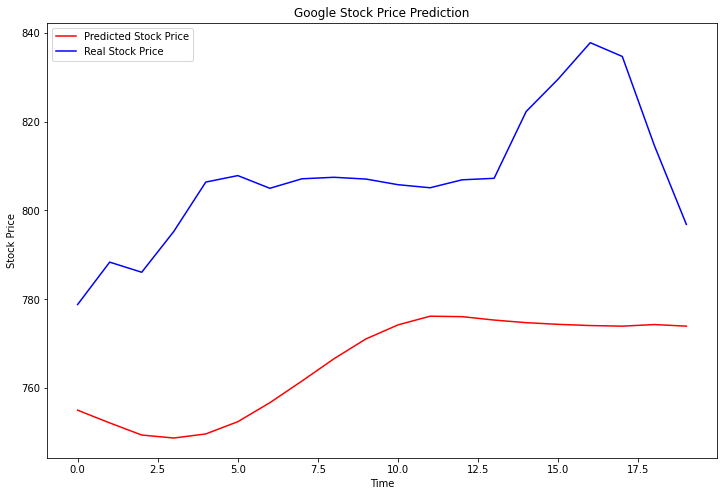

In [18]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()